In [1]:
!wget https://datahack-prod.s3.amazonaws.com/test_file/test_BdBKkAj_L87Nc3S.csv
!wget https://datahack-prod.s3.amazonaws.com/train_file/train_aWnotuB.csv
!wget https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_KVKNmI7.csv

--2020-05-24 17:26:16--  https://datahack-prod.s3.amazonaws.com/test_file/test_BdBKkAj_L87Nc3S.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.64.44
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.64.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 413302 (404K) [text/csv]
Saving to: ‘test_BdBKkAj_L87Nc3S.csv’

test_BdBKkAj_L87Nc3 100%[===================>] 403.62K   424KB/s    in 1.0s    

2020-05-24 17:26:18 (424 KB/s) - ‘test_BdBKkAj_L87Nc3S.csv’ saved [413302/413302]

--2020-05-24 17:26:22--  https://datahack-prod.s3.amazonaws.com/train_file/train_aWnotuB.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.64.28
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.64.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1815392 (1.7M) [text/csv]
Saving to: ‘train_aWnotuB.csv’

train_aWnotu

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
test = pd.read_csv('test_BdBKkAj_L87Nc3S.csv')
train = pd.read_csv('train_aWnotuB.csv')

In [4]:
train.head(2)

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011


In [5]:
test.head(2)

,DateTime,Junction,ID
0,2017-07-01 00:00:00,1,20170701001
1,2017-07-01 01:00:00,1,20170701011


In [6]:
train.isnull().sum(),test.isnull().sum(),train.shape,test.shape

(DateTime    0
 Junction    0
 Vehicles    0
 ID          0
 dtype: int64, DateTime    0
 Junction    0
 ID          0
 dtype: int64, (48120, 4), (11808, 3))

In [0]:
k=['DateTime']
for i in k:
  train[i] = pd.to_datetime(train[i])
  test[i] = pd.to_datetime(test[i])

In [0]:
k=['DateTime']
for i in k:
  test[i+'_'+'year'] = test[i].dt.year
  test[i+'_'+'day'] = test[i].dt.day
  test[i+'_'+'weekofyear'] = test[i].dt.weekofyear
  test[i+'_'+'month'] = test[i].dt.month
  test[i+'_'+'dayofweek'] =test[i].dt.dayofweek
  test[i+'_'+'weekend'] = (test[i].dt.weekday >=5).astype(int)
  test[i+'_'+'hour'] = test[i].dt.hour
  test[i+'_'+'minute'] = test[i].dt.minute
  train[i+'_'+'year'] = train[i].dt.year
  train[i+'_'+'day'] = train[i].dt.day
  train[i+'_'+'weekofyear'] = train[i].dt.weekofyear
  train[i+'_'+'month'] = train[i].dt.month
  train[i+'_'+'dayofweek'] = train[i].dt.dayofweek
  train[i+'_'+'weekend'] = (train[i].dt.weekday >=5).astype(int)
  train[i+'_'+'hour'] = train[i].dt.hour
  train[i+'_'+'minute'] = train[i].dt.minute

In [0]:
del train['DateTime']
del test['DateTime']

In [0]:
train_df=train

In [0]:
X = train_df.drop(labels=['Vehicles'], axis=1)
y = train_df['Vehicles'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((36090, 10), (36090,), (12030, 10), (12030,))

In [0]:
from math import sqrt 
from sklearn.metrics import mean_squared_error

In [37]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

param = {'objective': 'regression',
         'num_leaves':20,
         'boosting': 'dart',  
         'metric': 'rmse',
         'learning_rate': 0.01, 
         'num_iterations': 1000,
         'num_leaves': 80,
         'max_depth': 6,
         'min_data_in_leaf': 11,
         'bagging_fraction': 0.80,
         'bagging_freq': 1,
         'bagging_seed': 142,
         'feature_fraction': 0.80,
         'feature_fraction_seed': 2,
         'early_stopping_round': 200,
         'max_bin': 250
         }

lgbm = lgb.train(params=param, verbose_eval=100, train_set=train_data, valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_cv)
print('rmse:', sqrt(mean_squared_error(y_cv,y_pred_lgbm)))

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid_0's l1: 10.5732
[200]	valid_0's l1: 10.1309
[300]	valid_0's l1: 8.47918
[400]	valid_0's l1: 7.10394
[500]	valid_0's l1: 6.03898
[600]	valid_0's l1: 5.87297
[700]	valid_0's l1: 5.34871
[800]	valid_0's l1: 5.11577
[900]	valid_0's l1: 4.63508
[1000]	valid_0's l1: 4.44052
rmse: 7.2982068364894825


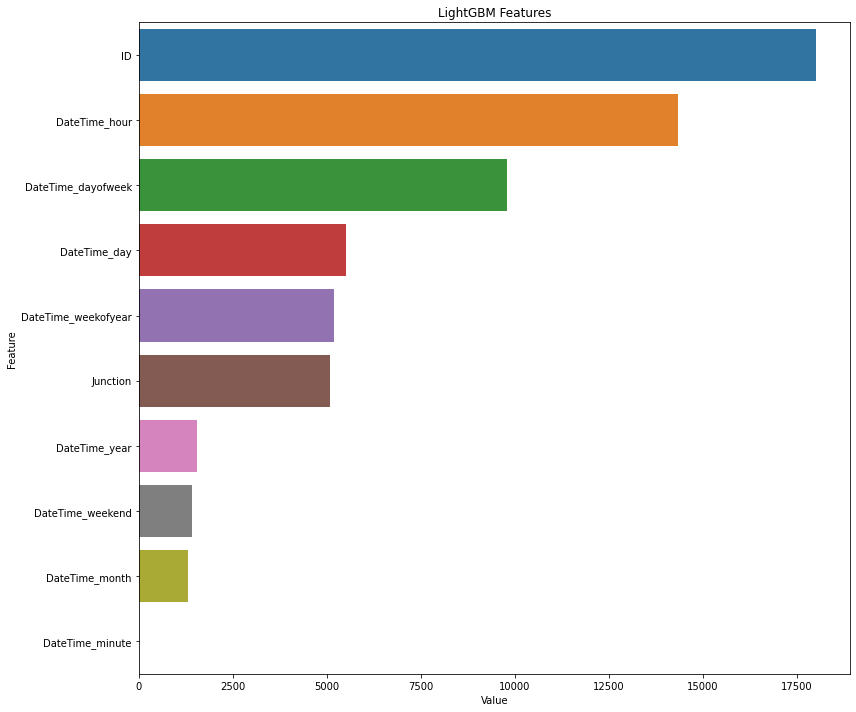

In [38]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importance(), X.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(12, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [0]:
Xtest = test

In [64]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor

errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=
             4, shuffle=True, random_state=101)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lgbm = LGBMRegressor(boosting_type='gbdt', num_leaves=100, max_depth=31, learning_rate=0.01, n_estimators=1000, min_child_samples=20, subsample=0.80)
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=100)

    y_pred_lgbm = lgbm.predict(X_test)
    print("rmse: ", sqrt(mean_squared_error(y_test, y_pred_lgbm)))

    errlgb.append(sqrt(mean_squared_error(y_test, y_pred_lgbm)))
    p = lgbm.predict(Xtest)
    y_pred_totlgb.append(p)

/usr/local/lib/python3.6/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


rmse:  3.678212893104091


/usr/local/lib/python3.6/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


rmse:  3.739667864288468


/usr/local/lib/python3.6/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


rmse:  3.6772320784467416


/usr/local/lib/python3.6/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


rmse:  3.7033114150919717


In [65]:
np.mean(errlgb,0)

3.6996060627328182

In [66]:
lgbm_final = np.mean(y_pred_totlgb,0)
lgbm_final

array([70.65743516, 61.97618573, 49.17222961, ...,  9.71855395,
       10.49369011,  9.33535942])

In [67]:
submission = pd.DataFrame({
        "ID": test['ID'],
        "Vehicles": lgbm_final
    })
submission.to_csv('./submission.csv', index=False)
print(submission)

                ID   Vehicles
0      20170701001  70.657435
1      20170701011  61.976186
2      20170701021  49.172230
3      20170701031  42.658104
4      20170701041  35.016215
...            ...        ...
11803  20171031194  11.441192
11804  20171031204  11.065244
11805  20171031214   9.718554
11806  20171031224  10.493690
11807  20171031234   9.335359

[11808 rows x 2 columns]


In [0]:
from google.colab import files
files.download('submission.csv')

# ensemble

In [69]:
!wget https://datahack-prod.s3.amazonaws.com/submissions/janatahack-machine-learning-for-iot/847_613210_us_submission_2.csv
!wget https://datahack-prod.s3.amazonaws.com/submissions/janatahack-machine-learning-for-iot/847_613210_us_submission.csv
!wget https://datahack-prod.s3.amazonaws.com/submissions/janatahack-machine-learning-for-iot/847_613210_us_submission_1.csv

--2020-05-24 18:00:29--  https://datahack-prod.s3.amazonaws.com/submissions/janatahack-machine-learning-for-iot/847_613210_us_submission_2.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.66.60
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.66.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 359160 (351K) [application/vnd.ms-excel]
Saving to: ‘847_613210_us_submission_2.csv’

847_613210_us_submi 100%[===================>] 350.74K   150KB/s    in 2.3s    

2020-05-24 18:00:33 (150 KB/s) - ‘847_613210_us_submission_2.csv’ saved [359160/359160]

--2020-05-24 18:00:43--  https://datahack-prod.s3.amazonaws.com/submissions/janatahack-machine-learning-for-iot/847_613210_us_submission.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.64.52
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.64.52|:443... connected.
HTTP 

In [0]:
a=pd.read_csv('847_613210_us_submission_2.csv')
b=pd.read_csv('847_613210_us_submission.csv')
c=pd.read_csv('847_613210_us_submission_1.csv')

In [71]:
a.head(2)

,ID,Vehicles
0,20170701001,70.688395
1,20170701011,61.623290


In [0]:
a['Vehicles']=a['Vehicles']*0.6+b['Vehicles']*0.3+c['Vehicles']*0.1

In [0]:
a.to_csv('ensem.csv', index=False)

In [0]:
from google.colab import files
files.download('ensem.csv')